In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [193]:
df=pd.read_csv('adult.csv')

In [194]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [196]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [197]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [198]:
l=df.columns.to_list()
l

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [199]:
lo=[]
li=[]
for i in l:
    if df[i].dtype == 'O':
        lo.append(i)
    else:
        li.append(i)
print(lo)
print(li)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [200]:
df['workclass']=df['workclass'].replace('?',df['workclass'].mode().iloc[0])
df['occupation']=df['occupation'].replace('?',df['occupation'].mode().iloc[0])
df['native-country']=df['native-country'].replace('?',df['native-country'].mode().iloc[0])

In [201]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [202]:
a=df[df['capital-gain']!=0]['capital-gain'].mean()
b=df[df['capital-loss']!=0]['capital-loss'].mean()

a

13061.665675340768

<Axes: xlabel='capital-gain'>

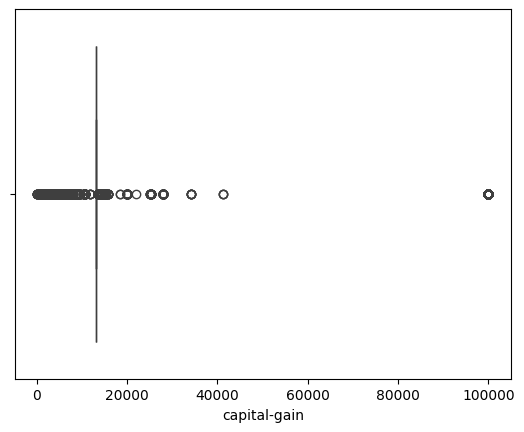

In [203]:
df['capital-gain']=df['capital-gain'].replace(0,a)
sns.boxplot(data=df,x='capital-gain')

<Axes: xlabel='capital-loss'>

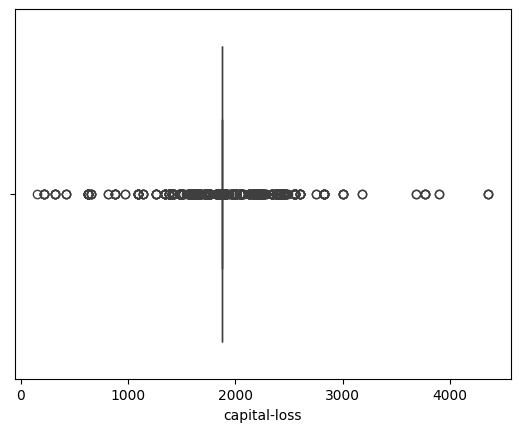

In [204]:
df['capital-loss']=df['capital-loss'].replace(0,b)
sns.boxplot(data=df,x='capital-loss')


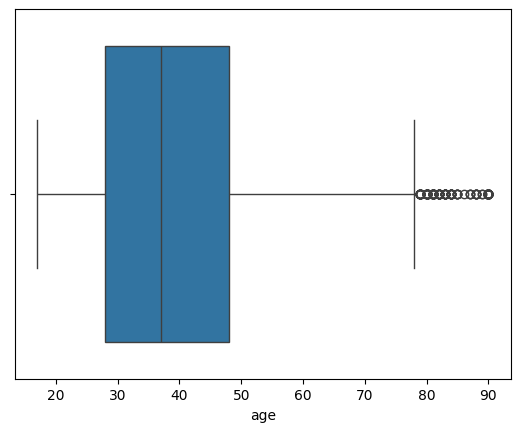

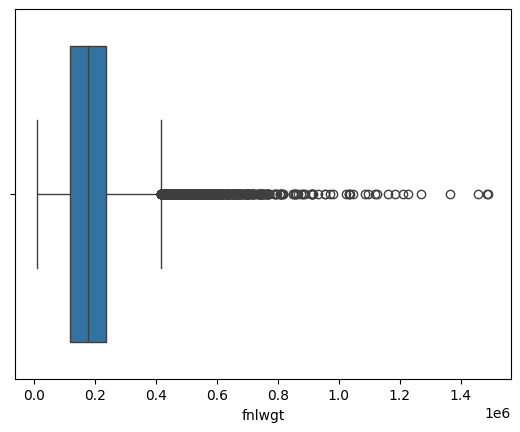

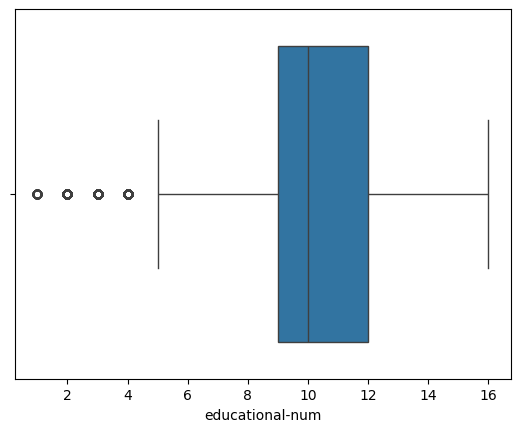

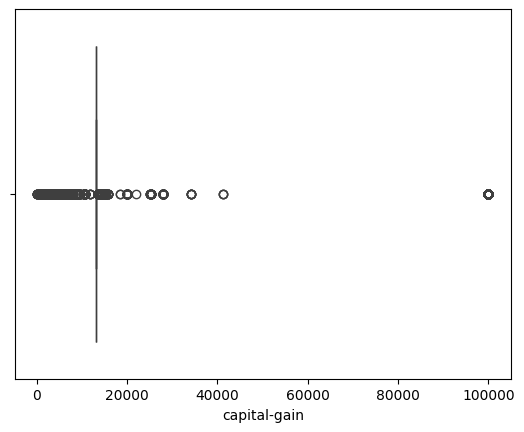

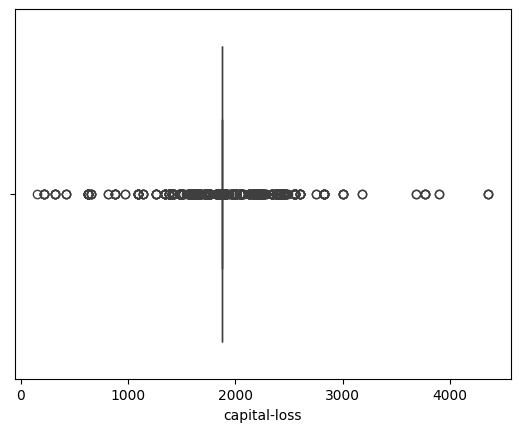

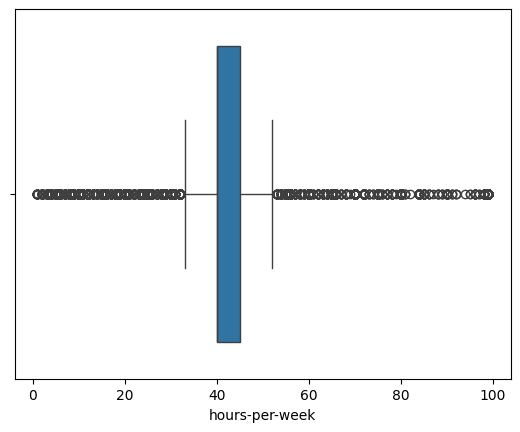

In [205]:
for i in li:
    sns.boxplot(data=df,x=i)
    plt.show()

In [206]:
li

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [207]:
abc=['age','educational-num','hours-per-week']
for col in abc:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    lb=q1-(1.5 * iqr)
    ub=q3+(1.5 * iqr)

    df=df[~((df[col]<= lb) | (df[col]>=ub))]
    # sns.boxplot(data=df,x=col)
    # plt.show()



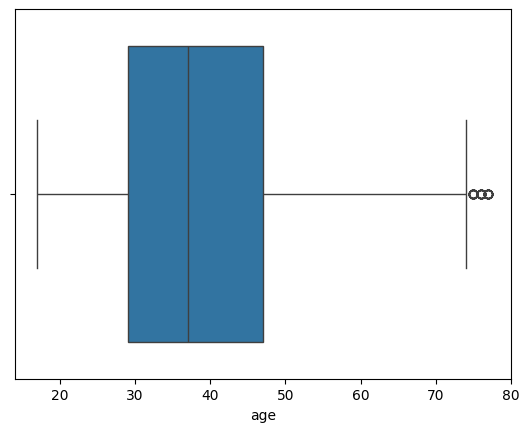

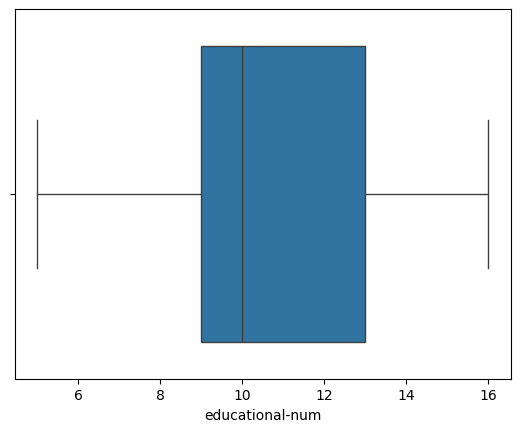

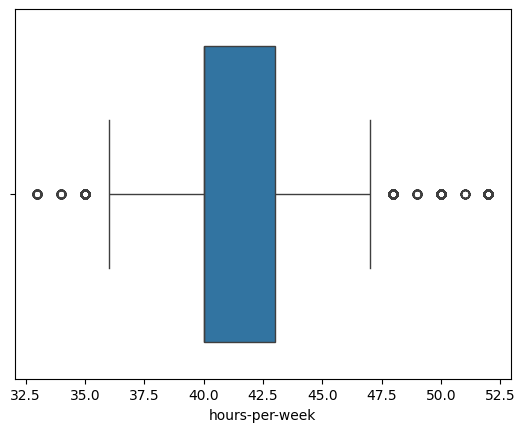

In [210]:
abc=['age','educational-num','hours-per-week']
for col in abc:
    sns.boxplot(data=df,x=col)
    plt.show()

In [211]:
corr_matrix=df[li].corr()
corr_matrix

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075773,0.072715,0.027067,0.023593,0.057757
fnlwgt,-0.075773,1.000000,-0.025202,-0.001877,0.001170,-0.008571
educational-num,0.072715,-0.025202,1.000000,0.065642,0.021827,0.150090
capital-gain,0.027067,-0.001877,0.065642,1.000000,-0.000152,0.027399
capital-loss,0.023593,0.001170,0.021827,-0.000152,1.000000,0.019522
hours-per-week,0.057757,-0.008571,0.150090,0.027399,0.019522,1.000000


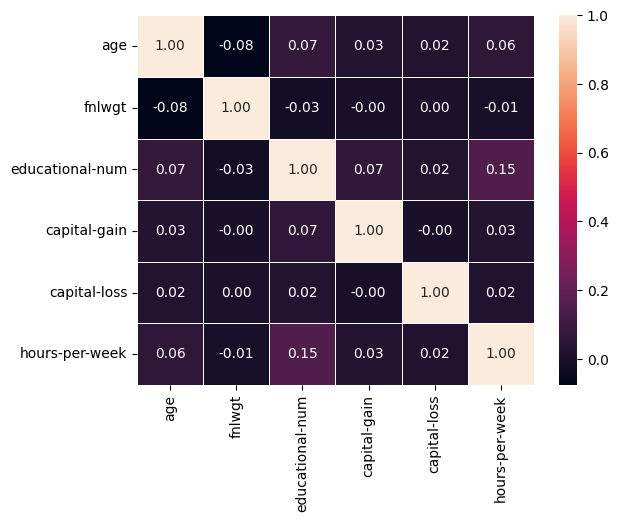

In [212]:
sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidths=.5)
plt.show()

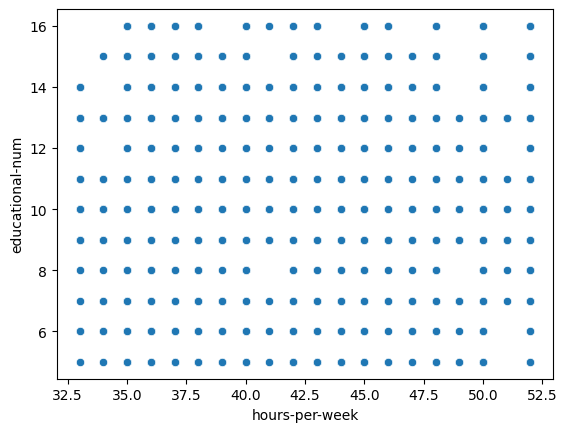

In [214]:
sns.scatterplot(x='hours-per-week',y='educational-num',data=df)
plt.show()

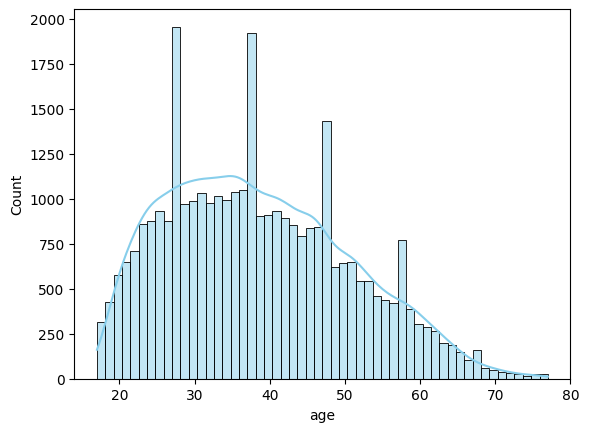

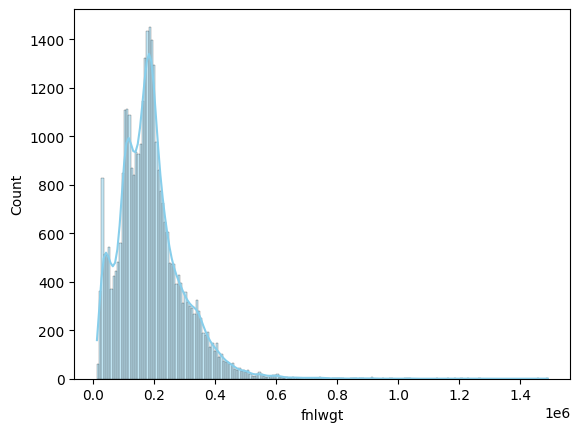

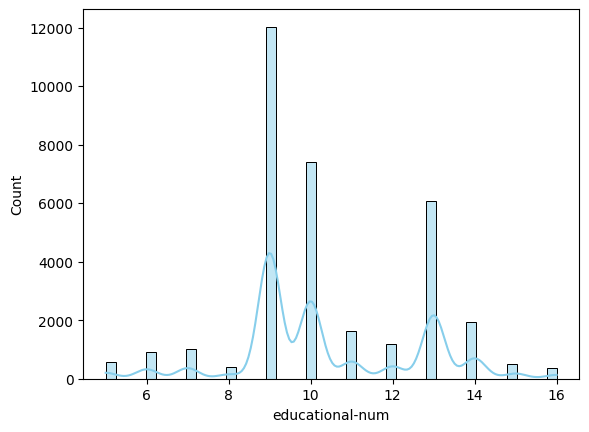

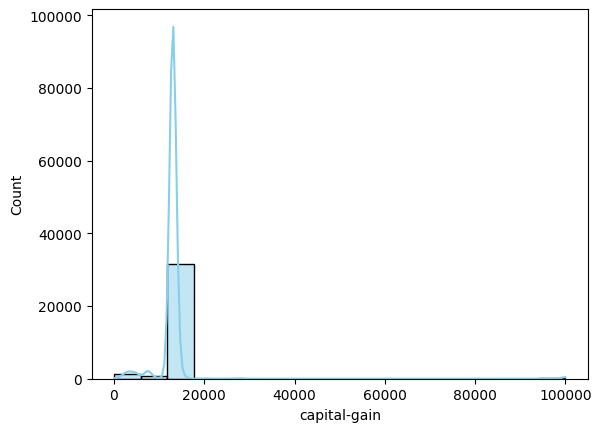

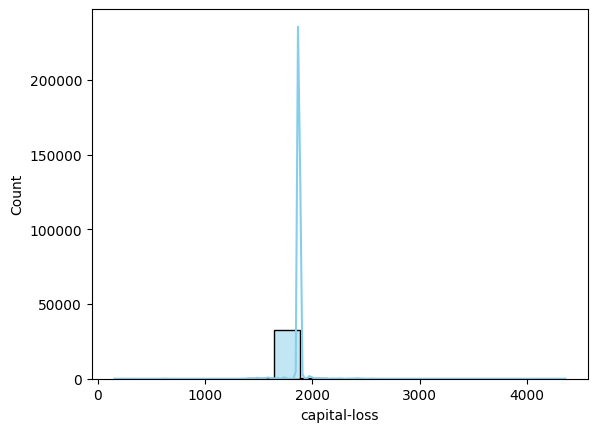

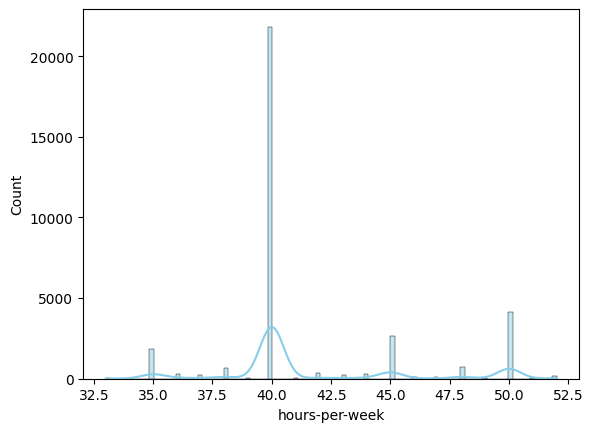

In [219]:
for i in li:
    sns.histplot(df[i],bins='auto',kde=True,color='skyblue')
    plt.show()

In [221]:
for i in li:
    mean=df[i].mean()
    median=df[i].median()
    mode=df[i].mode()
    std=df[i].std()

    print(i)
    print("mean:",mean)
    print("median:",median)
    print("mode:",mode)
    print("std deviation:",std)
    print()


age
mean: 38.541849313053454
median: 37.0
mode: 0    36
Name: age, dtype: int64
std deviation: 12.101894331316903

fnlwgt
mean: 190489.68629931452
median: 178946.0
mode: 0    203488
Name: fnlwgt, dtype: int64
std deviation: 105195.89568307418

educational-num
mean: 10.362860757259275
median: 10.0
mode: 0    9
Name: educational-num, dtype: int64
std deviation: 2.1992434671030163

capital-gain
mean: 12969.09126424128
median: 13061.665675340768
mode: 0    13061.665675
Name: capital-gain, dtype: float64
std deviation: 6022.850062785105

capital-loss
mean: 1872.0379787081338
median: 1872.8255915863278
mode: 0    1872.825592
Name: capital-loss, dtype: float64
std deviation: 79.47312762074407

hours-per-week
mean: 41.59453973110529
median: 40.0
mode: 0    40
Name: hours-per-week, dtype: int64
std deviation: 4.033567400883081



In [223]:
len(l)

15

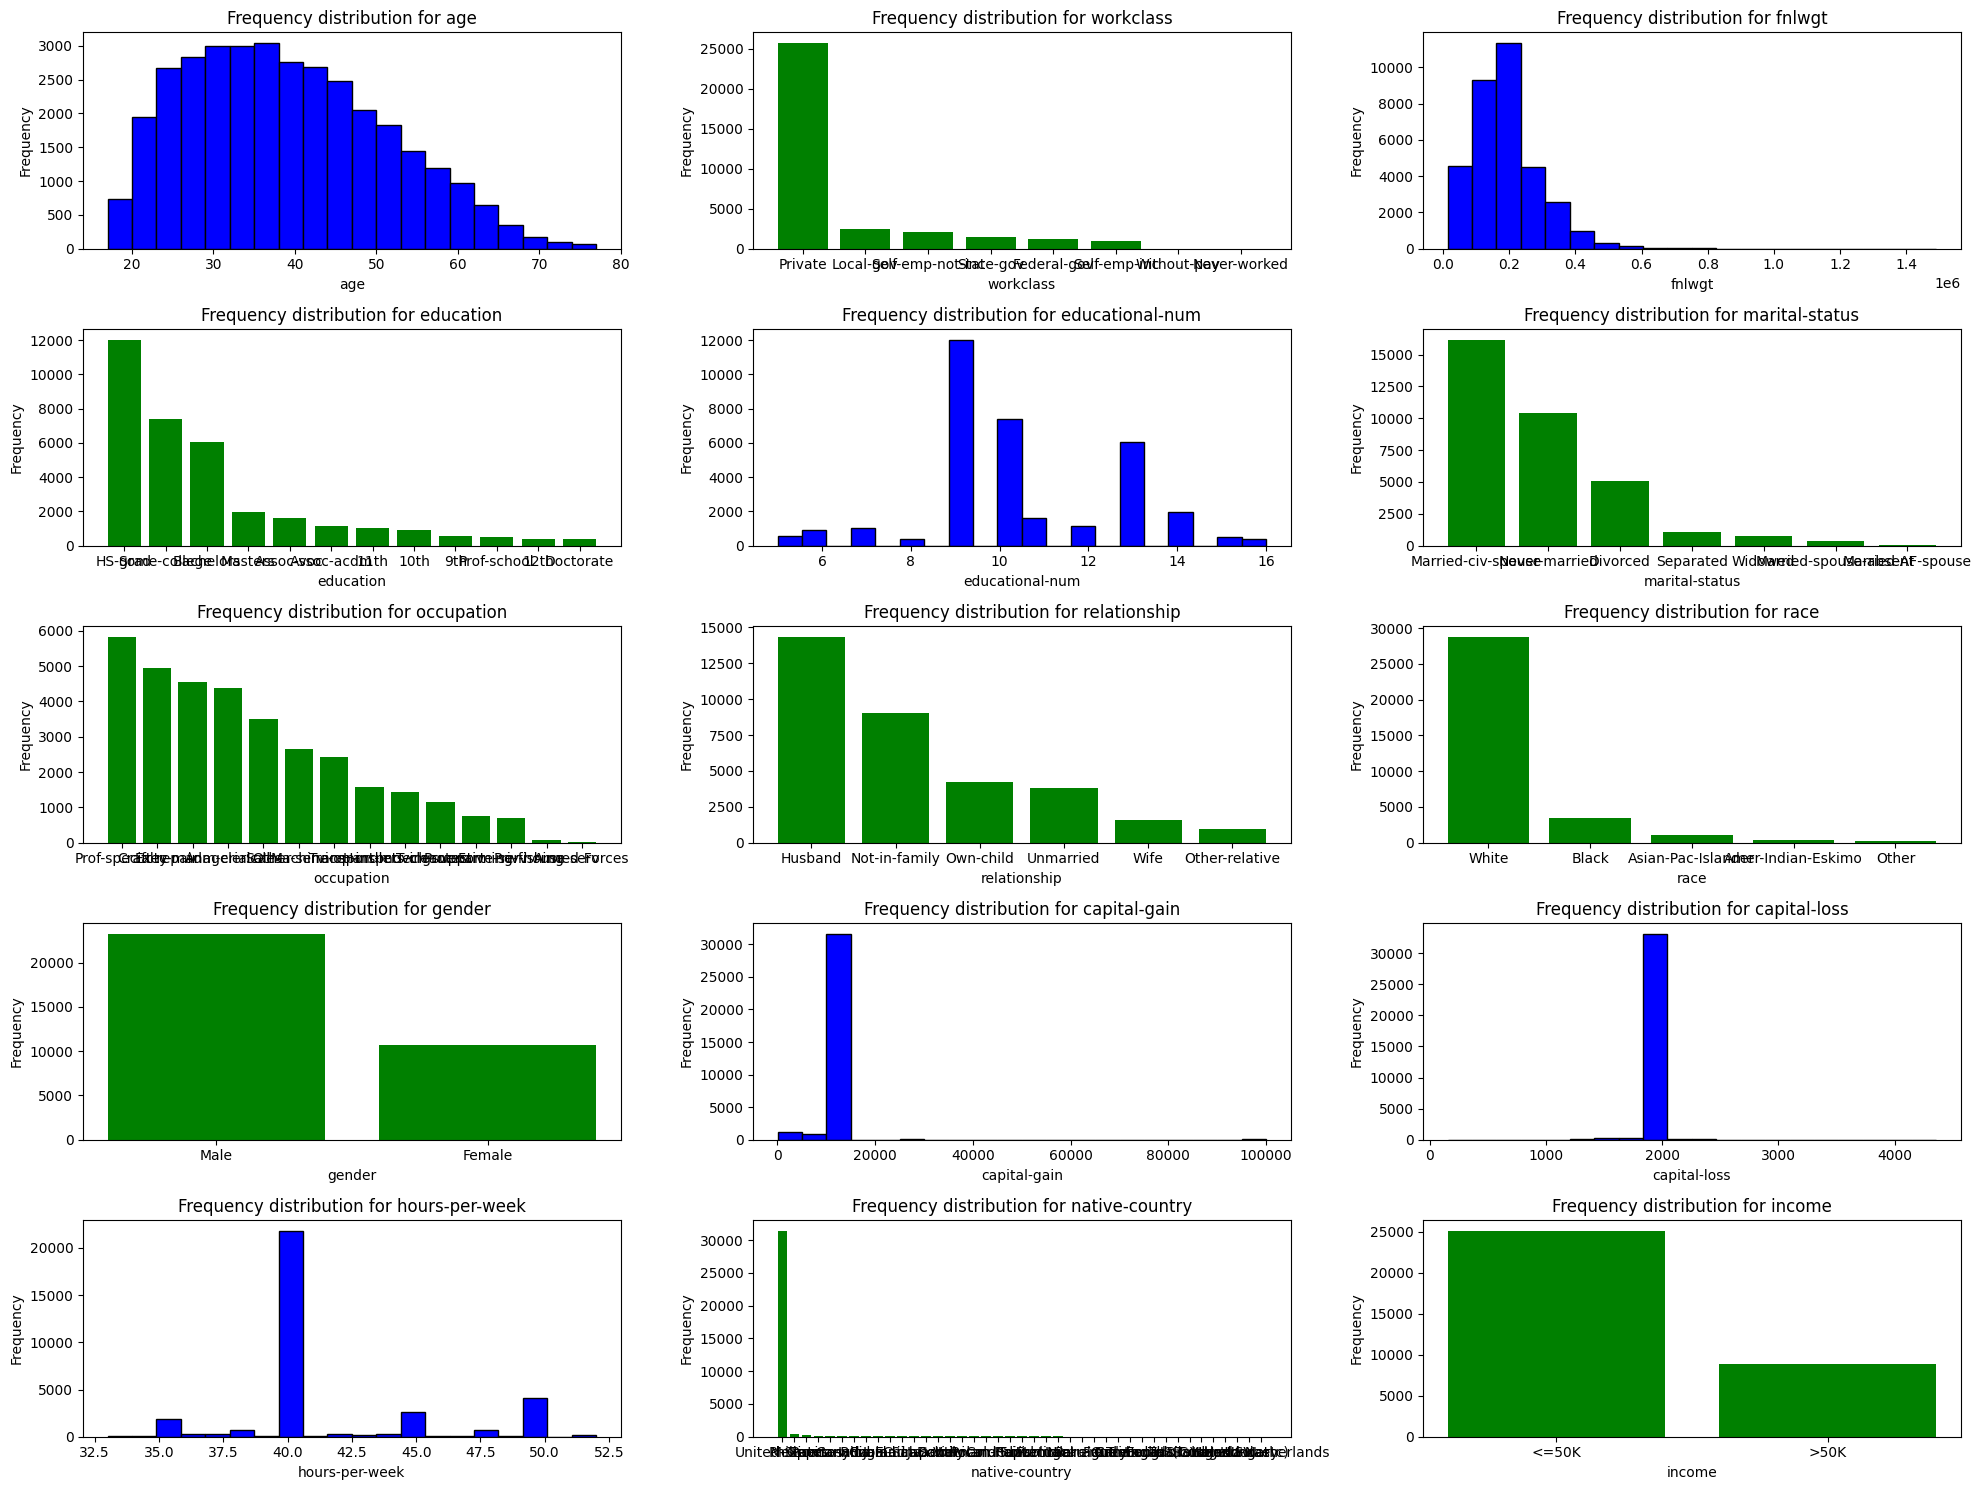

In [227]:
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(20,15))
axes=axes.flatten()

for i, col in enumerate(df.columns):
    if df[col].dtype == "O":
        value_counts=df[col].value_counts()
        axes[i].bar(value_counts.index,value_counts.values,color='green')
        axes[i].set_title(f'Frequency distribution for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(f'Frequency')
    else:
        axes[i].hist(df[col],bins=20,color='blue',edgecolor='black')
        axes[i].set_title(f'Frequency distribution for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(f'Frequency')
        # continue
plt.tight_layout()
plt.show()



In [228]:
df['age'].describe()

count    33991.000000
mean        38.541849
std         12.101894
min         17.000000
25%         29.000000
50%         37.000000
75%         47.000000
max         77.000000
Name: age, dtype: float64

In [232]:
from statsmodels.stats.weightstats import ztest as ztest

print("H0: There is no diff btw the means")
print("H1: There is a significant diff btw the means")

l=df['age']

a,b=ztest(l,value=38)

if b<0.05:
    print("accpet H1")
else:
    print("accpet H0")
print(b)



H0: There is no diff btw the means
H1: There is a significant diff btw the means
accpet H1
1.5214263502326616e-16


In [234]:
from statsmodels.stats.weightstats import ztest as ztest

print("H0: There is no diff btw the means")
print("H1: There is a significant diff btw the means")

l=df['age']
m=df['educational-num']

a,b=ztest(l,m)

if b<0.05:
    print("accpet H1")
else:
    print("accpet H0")
print(b)



H0: There is no diff btw the means
H1: There is a significant diff btw the means
accpet H1
0.0


In [239]:
# from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats

print("H0: There is no diff btw the means")
print("H1: There is a significant diff btw the means")

l=df['age']

a,b=stats.ttest_1samp(l,38)

if b<0.05:
    print("accpet H1")
else:
    print("accpet H0")
print(b)



H0: There is no diff btw the means
H1: There is a significant diff btw the means
accpet H1
1.5757787658499526e-16


In [240]:
# from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats

print("H0: There is no diff btw the means")
print("H1: There is a significant diff btw the means")

m=df['educational-num']
l=df['age']

a,b=stats.ttest_ind(l,m)

if b<0.05:
    print("accpet H1")
else:
    print("accpet H0")
print(b)



H0: There is no diff btw the means
H1: There is a significant diff btw the means
accpet H1
0.0


In [249]:
# from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import f_oneway

print("H0: There is no diff btw the means")
print("H1: There is a significant diff btw the means")

l='gender'
m=['age','educational-num','hours-per-week']

for i in m:
    # a=[df[i][df[l]==group] for group in df[l]]
    a=[df[i][df[l]==group] for group in df[l].unique()]

    a,b=f_oneway(*a)

    if b<0.05:
        print("accpet H1")
    else:
        print("accpet H0")
    print(b)

H0: There is no diff btw the means
H1: There is a significant diff btw the means
accpet H1
1.2649635799132693e-32
accpet H0
0.7667365798753838
accpet H1
2.008747456200791e-246


In [241]:
li

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [242]:
lo

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']